In [292]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture

from sklearn import tree
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform
import plotly.express as px
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [165]:
dataset = pd.read_csv('churn_data.csv')
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [166]:
dataset = dataset.drop(columns=["RowNumber", "CustomerId", "Surname"])
dataset.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0       2       0.00              1   
1          608     Spain  Female  41.0       1   83807.86              1   
2          502    France  Female  42.0       8  159660.80              3   
3          699    France  Female  39.0       1       0.00              2   
4          850     Spain  Female  43.0       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             1.0        101348.88       1  
1        0.0             1.0        112542.58       0  
2        1.0             0.0        113931.57       1  
3        0.0             0.0         93826.63       0  
4        NaN             1.0         79084.10       0

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [168]:
dataset.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  73
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

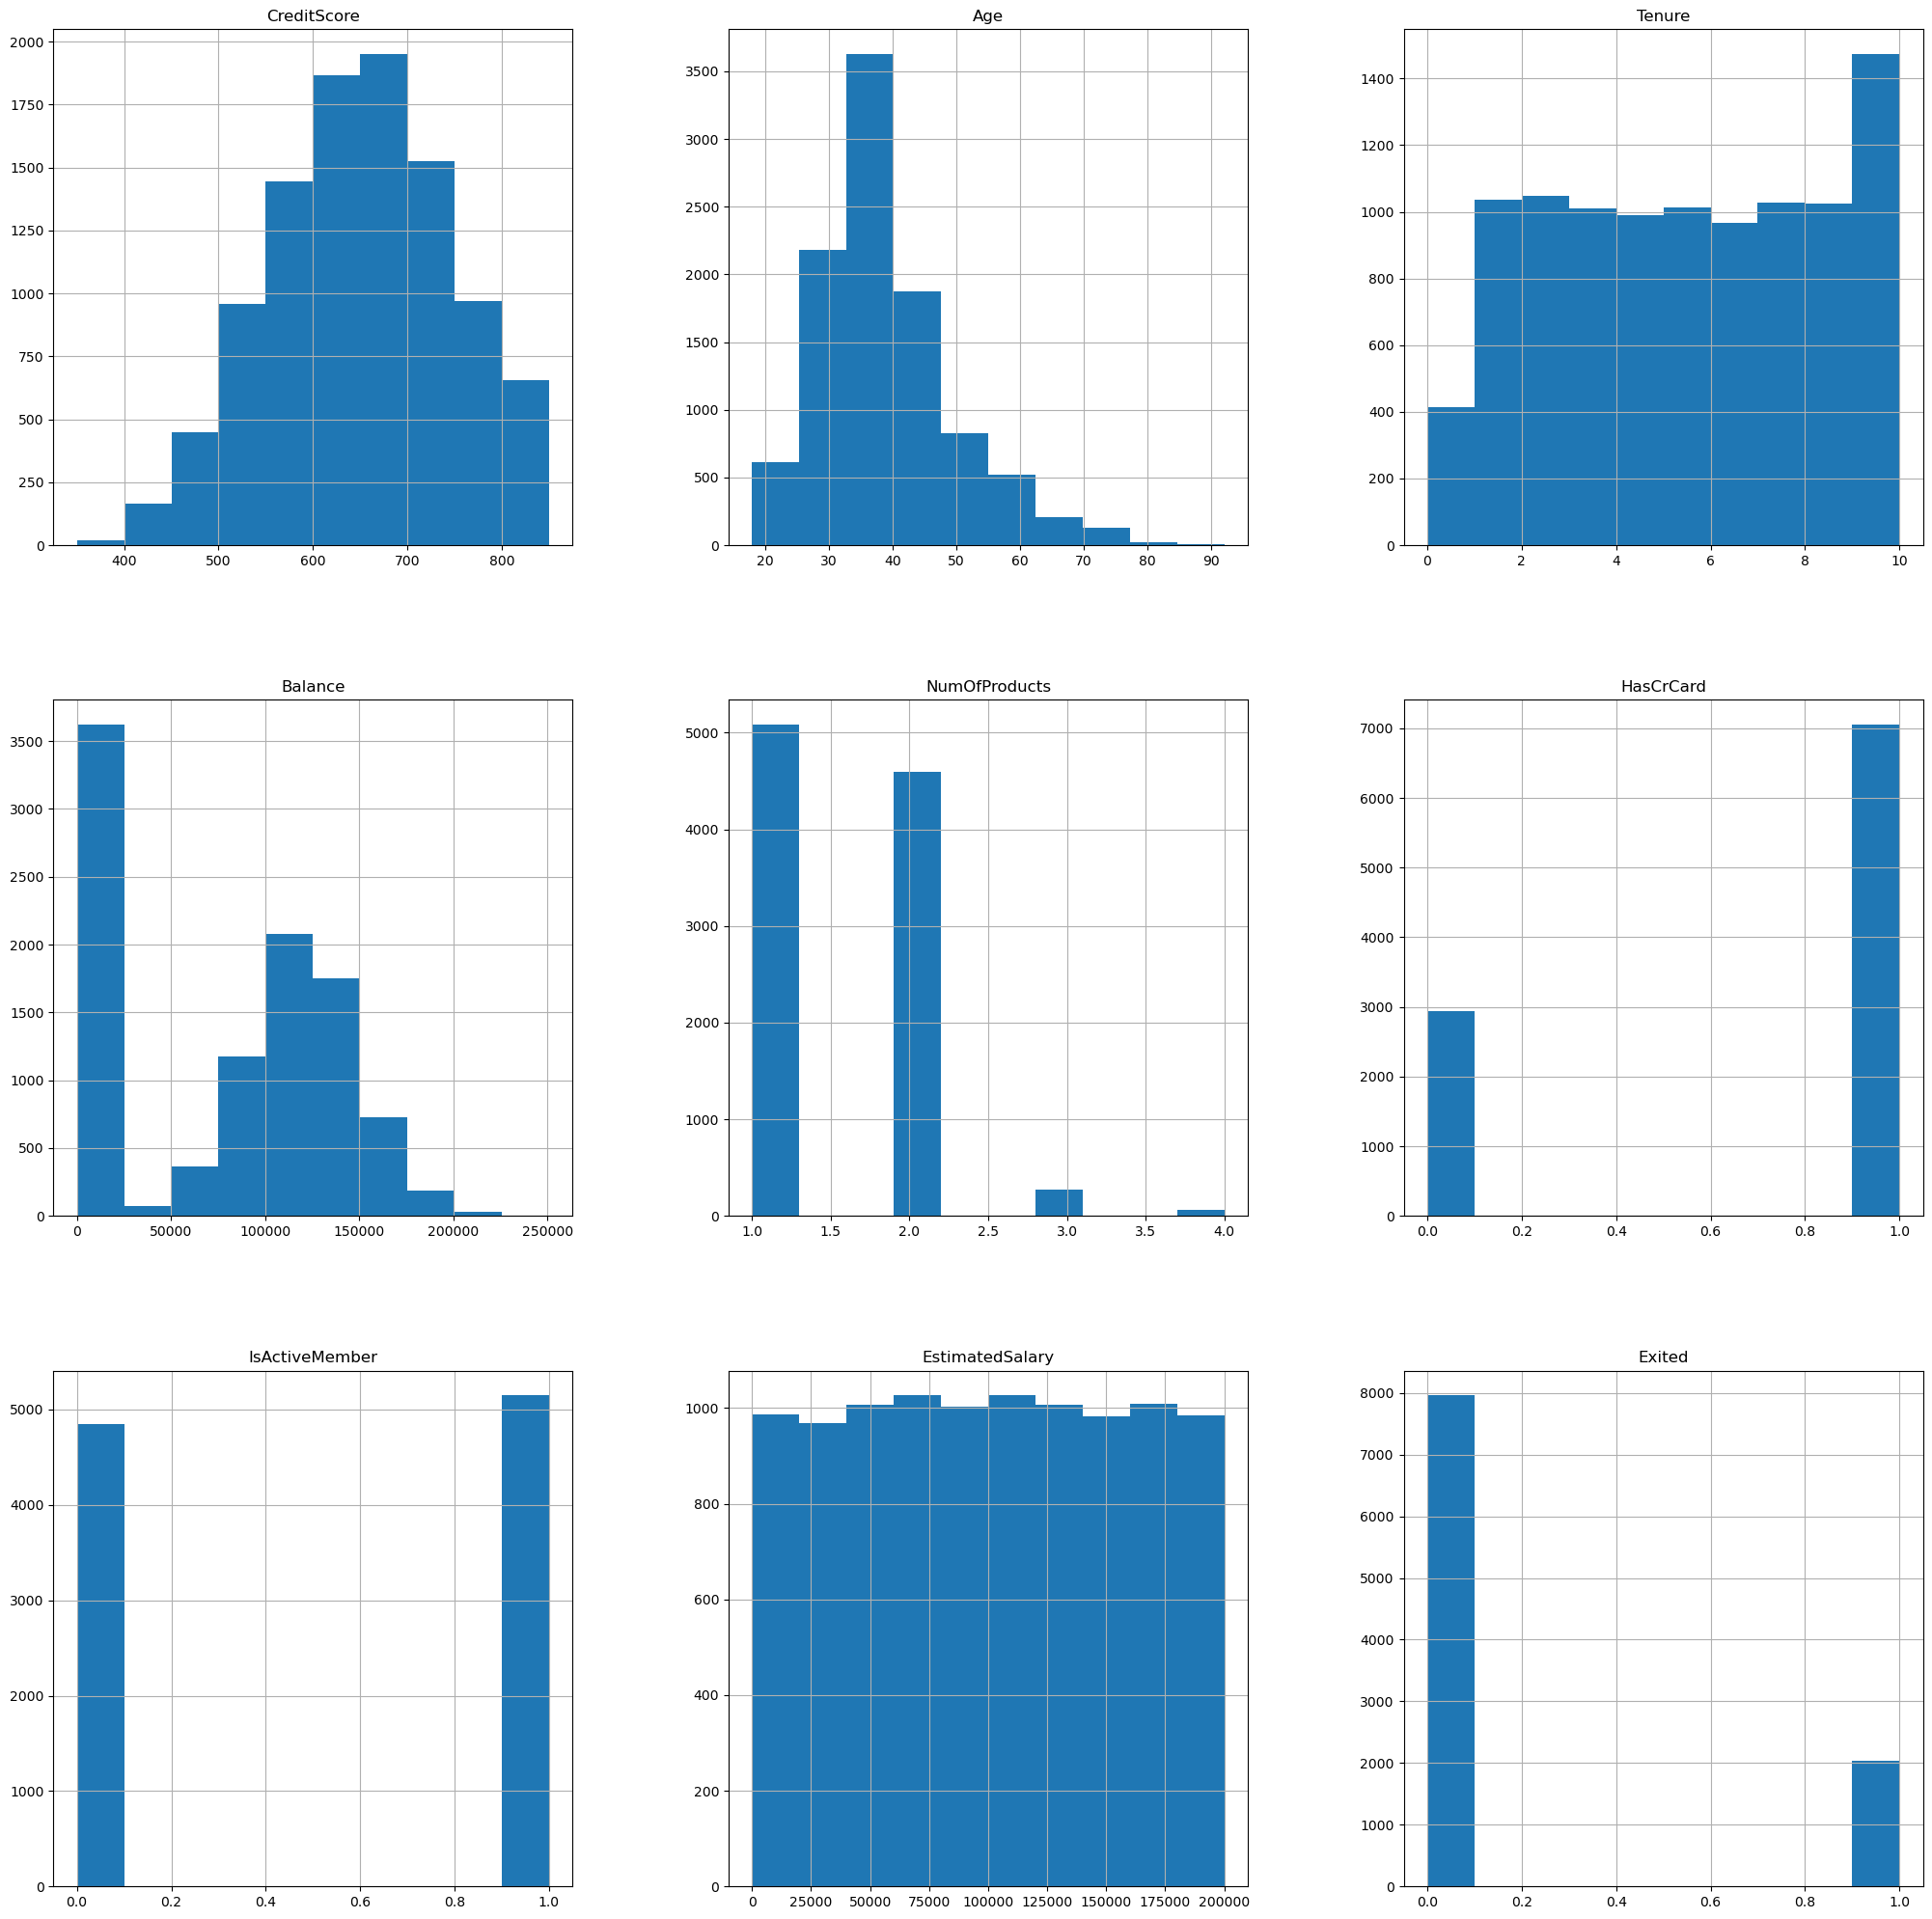

In [169]:
dataset.hist(figsize = (25,25))

U zasebnom datasetu dataset_scale cuvacemo skalirane podatke

In [170]:
dataset.count()

CreditScore        10002
Geography          10001
Gender             10002
Age                10001
Tenure             10002
Balance            10002
NumOfProducts      10002
HasCrCard          10001
IsActiveMember     10001
EstimatedSalary    10002
Exited             10002
dtype: int64

In [171]:
dataset.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [172]:
dataset.dropna(axis='rows', inplace=True)

In [173]:
dataset.count()

CreditScore        9998
Geography          9998
Gender             9998
Age                9998
Tenure             9998
Balance            9998
NumOfProducts      9998
HasCrCard          9998
IsActiveMember     9998
EstimatedSalary    9998
Exited             9998
dtype: int64

In [174]:
dataset

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0              619    France  Female  42.0       2       0.00              1   
1              608     Spain  Female  41.0       1   83807.86              1   
2              502    France  Female  42.0       8  159660.80              3   
3              699    France  Female  39.0       1       0.00              2   
5              645     Spain    Male  44.0       8  113755.78              2   
...            ...       ...     ...   ...     ...        ...            ...   
9997           709    France  Female  36.0       7       0.00              1   
9998           772   Germany    Male  42.0       3   75075.31              2   
9999           772   Germany    Male  42.0       3   75075.31              2   
10000          792    France  Female  28.0       4  130142.79              1   
10001          792    France  Female  28.0       4  130142.79              1   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        101348.88       1  
1            0.0             1.0        112542.58       0  
2            1.0             0.0        113931.57       1  
3            0.0             0.0         93826.63       0  
5            1.0             0.0        149756.71       1  
...          ...             ...              ...     ...  
9997         0.0             1.0         42085.58       1  
9998         1.0             0.0         92888.52       1  
9999         1.0             0.0         92888.52       1  
10000        1.0             0.0         38190.78       0  
10001        1.0             0.0         38190.78       0  

[9998 rows x 11 columns]

In [175]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

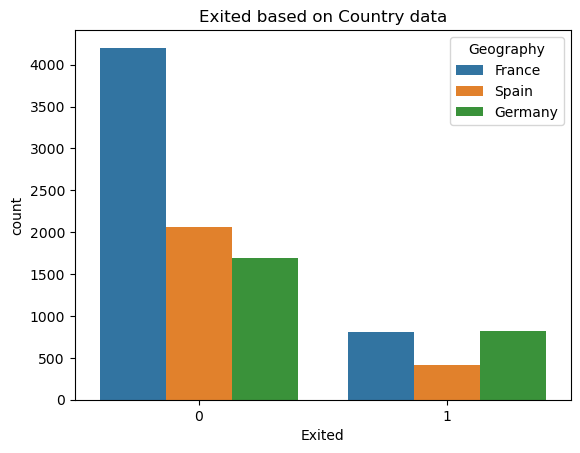

In [176]:
sn.countplot(
    x="Exited", hue="Geography", data=dataset
)
plt.title("Exited based on Country data")
plt.show()

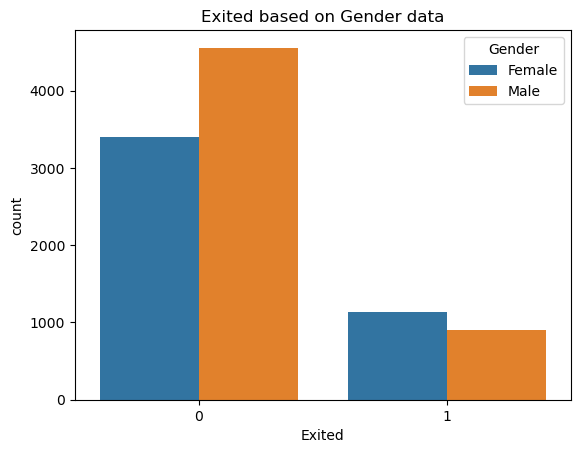

In [177]:
sn.countplot(
    x="Exited", hue="Gender", data=dataset
)
plt.title("Exited based on Gender data")
plt.show()

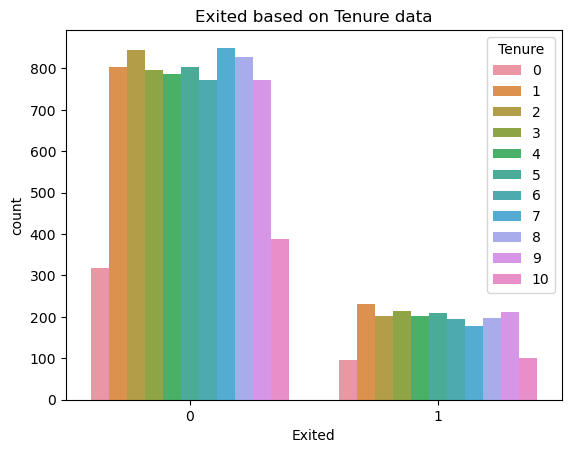

In [178]:
sn.countplot(
    x="Exited", hue="Tenure", data=dataset
)
plt.title("Exited based on Tenure data")
plt.show()

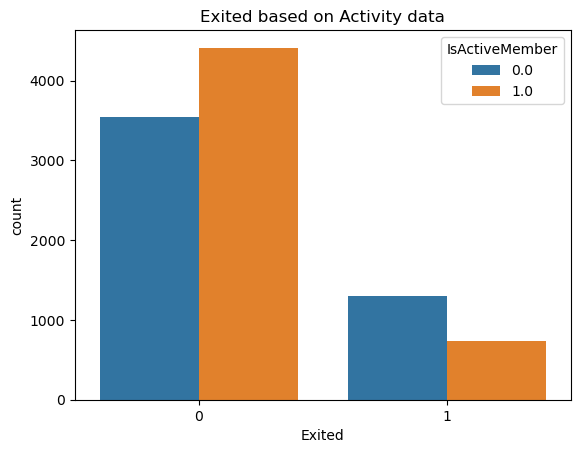

In [179]:
sn.countplot(
    x="Exited", hue="IsActiveMember", data=dataset
)
plt.title("Exited based on Activity data")
plt.show()

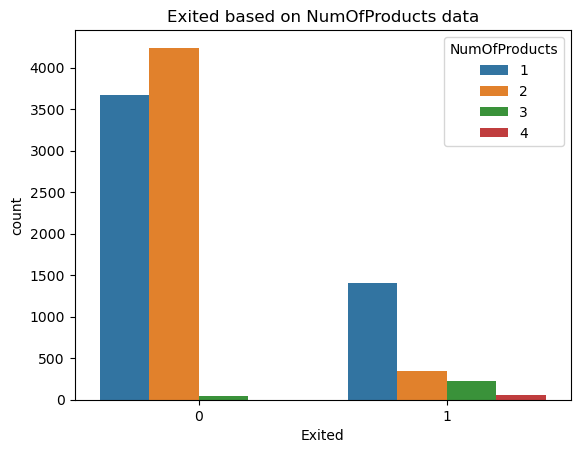

In [180]:
sn.countplot(
    x="Exited", hue="NumOfProducts", data=dataset
)
plt.title("Exited based on NumOfProducts data")
plt.show()

In [181]:
dataset.loc[dataset["NumOfProducts"] == 4]

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female  29.0       4  115046.74              4   
70            738   Germany    Male  58.0       2  133745.44              4   
1254          628    France  Female  46.0       1   46870.43              4   
1469          819   Germany  Female  49.0       1  120656.86              4   
1488          596     Spain    Male  30.0       6  121345.88              4   
1701          792    France    Male  50.0       9       0.00              4   
1876          640   Germany    Male  39.0       9  131607.28              4   
2124          704    France    Male  32.0       7  127785.17              4   
2196          773   Germany    Male  47.0       2  118079.47              4   
2285          630   Germany    Male  50.0       3  129370.91              4   
2462          672    France  Female  53.0       9  169406.33              4   
2499          614    France  Female  37.0       8   75150.34              4   
2509          655    France  Female  50.0      10       0.00              4   
2541          611    France  Female  61.0       3  131583.59              4   
2614          546   Germany  Female  58.0       3  106458.31              4   
2617          692   Germany    Male  45.0       6  152296.83              4   
2872          439     Spain    Male  52.0       3   96196.24              4   
3152          644    France  Female  40.0       9  137285.26              4   
3365          671     Spain  Female  34.0       5  130929.02              4   
3841          653    France  Female  60.0       2  120731.39              4   
4013          720   Germany  Female  57.0       1  162082.31              4   
4014          641   Germany  Female  51.0       2  117306.69              4   
4166          850     Spain  Female  45.0       5  174088.30              4   
4260          587    France    Male  40.0       2       0.00              4   
4403          602   Germany  Female  43.0       2  113641.49              4   
4511          634    France  Female  45.0       2       0.00              4   
4516          497   Germany  Female  32.0       8  111537.23              4   
4606          797    France  Female  55.0      10       0.00              4   
4654          578   Germany  Female  31.0       5  102088.68              4   
4748          537   Germany  Female  37.0       7  158411.95              4   
4822          745    France  Female  32.0       2       0.00              4   
5010          575   Germany    Male  49.0       7  121205.15              4   
5137          698    France  Female  51.0       6  144237.91              4   
5235          645    France  Female  68.0       9       0.00              4   
5386          642    France    Male  48.0       9  118317.27              4   
5700          447    France    Male  41.0       3       0.00              4   
5904          692   Germany    Male  45.0       6  142084.04              4   
6150          632   Germany    Male  41.0       8  127205.32              4   
6172          568   Germany    Male  43.0       5   87612.64              4   
6279          757     Spain  Female  55.0       9  117294.12              4   
6750          618    France  Female  42.0       2       0.00              4   
6875          610    France  Female  57.0       7   72092.95              4   
7257          747    France  Female  47.0       5  139914.60              4   
7457          665   Germany  Female  43.0       2  116322.27              4   
7567          629    France    Male  44.0       5       0.00              4   
7698          592    France    Male  60.0       9       0.00              4   
7724          842    France    Male  44.0       3  141252.18              4   
7729          850    France  Female  35.0       2  128548.49              4   
8041          698     Spain  Female  50.0       1       0.00              4   
8590          771    France  Female  41.0      10  10830

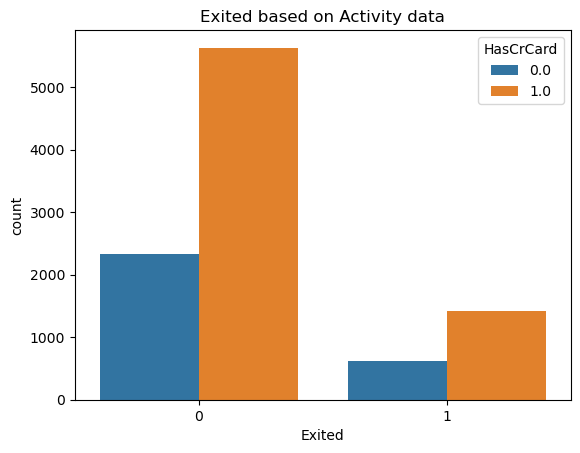

In [182]:
sn.countplot(
    x="Exited", hue="HasCrCard", data=dataset
)
plt.title("Exited based on Activity data")
plt.show()

Nakon vizuelizacije podataka zakljucujemo: 
* najveci broj korisnika iz Francuske
* zemlja porekla ne utice u znacajnoj meri na odliv klijenata, svakako veci rizik predstavljaju klijenti iz Nemacke i Spanije
* pol ne utice znacajno na odliv klijenata, veci rizik od napustanja banke ako je klijent zenskog pola
* godine saradnje ne uticu znacajno, najmanji rizik za korisnike koji su klijenti manje od jedne ili vise od 9 godina
* veci odliv neaktivnih korisnika
* 4 proizvoda banke koristili su samo klijenti koji su prekinuli saradnju, cak 60 takvih slucajeva

Enkodiranje kategorickih vrednosti

In [303]:
label_enc = LabelEncoder()

dataset["Geography"] = label_enc.fit_transform(dataset[["Geography"]])
dataset["Gender"] = label_enc.fit_transform(dataset[["Gender"]])

dataset

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0              619          0       0  42.0       2       0.00              1   
1              608          2       0  41.0       1   83807.86              1   
2              502          0       0  42.0       8  159660.80              3   
3              699          0       0  39.0       1       0.00              2   
5              645          2       1  44.0       8  113755.78              2   
...            ...        ...     ...   ...     ...        ...            ...   
9997           709          0       0  36.0       7       0.00              1   
9998           772          1       1  42.0       3   75075.31              2   
9999           772          1       1  42.0       3   75075.31              2   
10000          792          0       0  28.0       4  130142.79              1   
10001          792          0       0  28.0       4  130142.79              1   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0        101348.88       1  
1            0.0             1.0        112542.58       0  
2            1.0             0.0        113931.57       1  
3            0.0             0.0         93826.63       0  
5            1.0             0.0        149756.71       1  
...          ...             ...              ...     ...  
9997         0.0             1.0         42085.58       1  
9998         1.0             0.0         92888.52       1  
9999         1.0             0.0         92888.52       1  
10000        1.0             0.0         38190.78       0  
10001        1.0             0.0         38190.78       0  

[9998 rows x 11 columns]

In [184]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data_standard = scaler.fit_transform(dataset)

# Create DataFrame from scaled data
dataset_scaled = pd.DataFrame(data=scaled_data_standard, columns=dataset.columns)

dataset_scaled

CreditScore  Geography    Gender       Age    Tenure   Balance  \
0       -0.326298  -0.902028 -1.095787  0.293657 -1.041838 -1.225860   
1       -0.440137   1.515146 -1.095787  0.198305 -1.387619  0.117428   
2       -1.537125  -0.902028 -1.095787  0.293657  1.032846  1.333214   
3        0.501618  -0.902028 -1.095787  0.007601 -1.387619 -1.225860   
4       -0.057226   1.515146  0.912586  0.484361  1.032846  0.597439   
...           ...        ...       ...       ...       ...       ...   
9993     0.605107  -0.902028 -1.095787 -0.278455  0.687065 -1.225860   
9994     1.257091   0.306559  0.912586  0.293657 -0.696057 -0.022539   
9995     1.257091   0.306559  0.912586  0.293657 -0.696057 -0.022539   
9996     1.464070  -0.902028 -1.095787 -1.041271 -0.350277  0.860094   
9997     1.464070  -0.902028 -1.095787 -1.041271 -0.350277  0.860094   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
0         -0.911570   0.646028        0.970820         0.021720  1.976307  
1         -0.911570  -1.547921        0.970820         0.216366 -0.505994  
2          2.526981   0.646028       -1.030057         0.240519  1.976307  
3          0.807705  -1.547921       -1.030057        -0.109083 -0.505994  
4          0.807705   0.646028       -1.030057         0.863478  1.976307  
...             ...        ...             ...              ...       ...  
9993      -0.911570  -1.547921        0.970820        -1.008801  1.976307  
9994       0.807705   0.646028       -1.030057        -0.125396  1.976307  
9995       0.807705   0.646028       -1.030057        -0.125396  1.976307  
9996      -0.911570   0.646028       -1.030057        -1.076527 -0.505994  
9997      -0.911570   0.646028       -1.030057        -1.076527 -0.505994  

[9998 rows x 11 columns]

In [185]:
dataset.shape

(9998, 11)

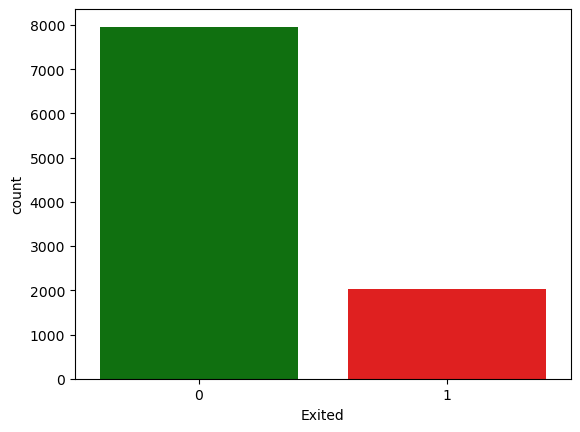

In [186]:
sn.countplot(
    x="Exited", data=dataset, palette=("green", "red")
)
plt.show()

In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   int32  
 2   Gender           9998 non-null   int32  
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 859.2 KB


In [188]:
dataset.describe(include='all',)

CreditScore    Geography       Gender          Age       Tenure  \
count  9998.000000  9998.000000  9998.000000  9998.000000  9998.000000   
mean    650.529606     0.746349     0.545609    38.920287     5.013003   
std      96.633003     0.827454     0.497940    10.487986     2.892152   
min     350.000000     0.000000     0.000000    18.000000     0.000000   
25%     584.000000     0.000000     0.000000    32.000000     3.000000   
50%     652.000000     0.000000     1.000000    37.000000     5.000000   
75%     718.000000     1.000000     1.000000    44.000000     7.000000   
max     850.000000     2.000000     1.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9998.000000    9998.000000  9998.000000     9998.000000   
mean    76481.490819       1.530206     0.705541        0.514803   
std     62393.187035       0.581669     0.455822        0.499806   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     97173.290000       1.000000     1.000000        1.000000   
75%    127641.417500       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited  
count      9998.000000  9998.000000  
mean     100099.786455     0.203841  
std       57510.939962     0.402872  
min          11.580000     0.000000  
25%       50983.750000     0.000000  
50%      100218.210000     0.000000  
75%      149395.882500     0.000000  
max      199992.480000     1.000000

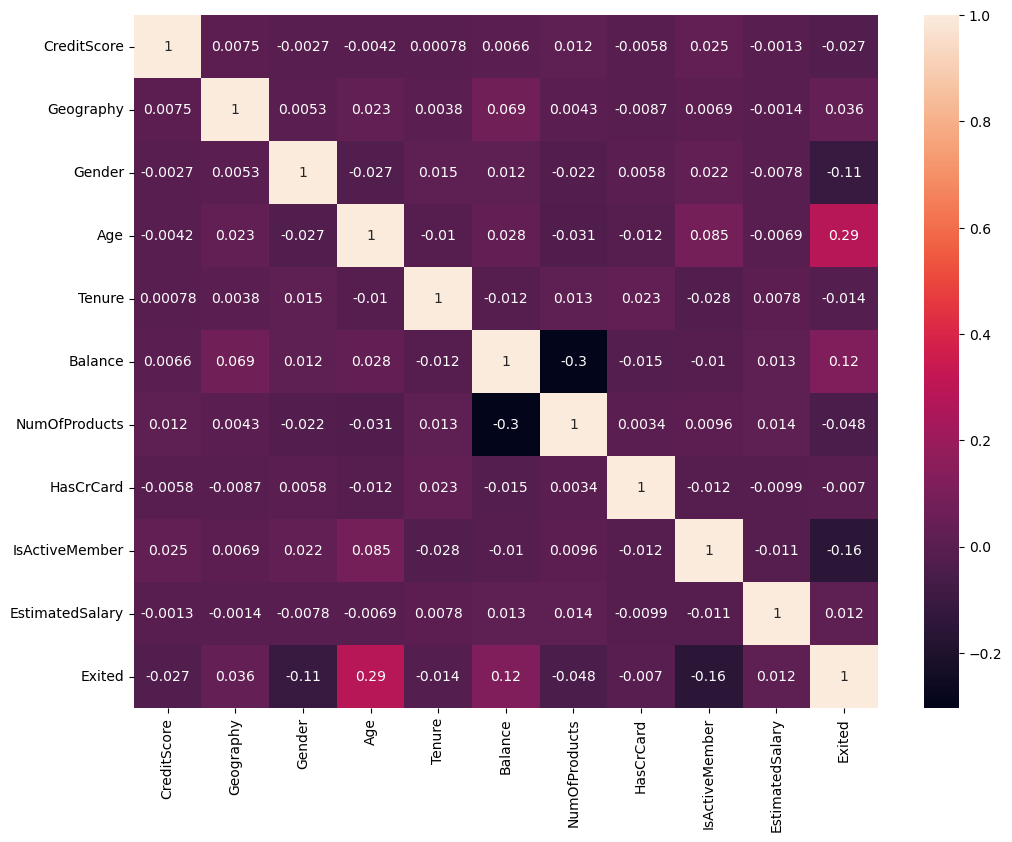

In [189]:
corr = dataset.corr()
plt.subplots(figsize=(12, 9))
sn.heatmap(corr, annot=True)
plt.show()

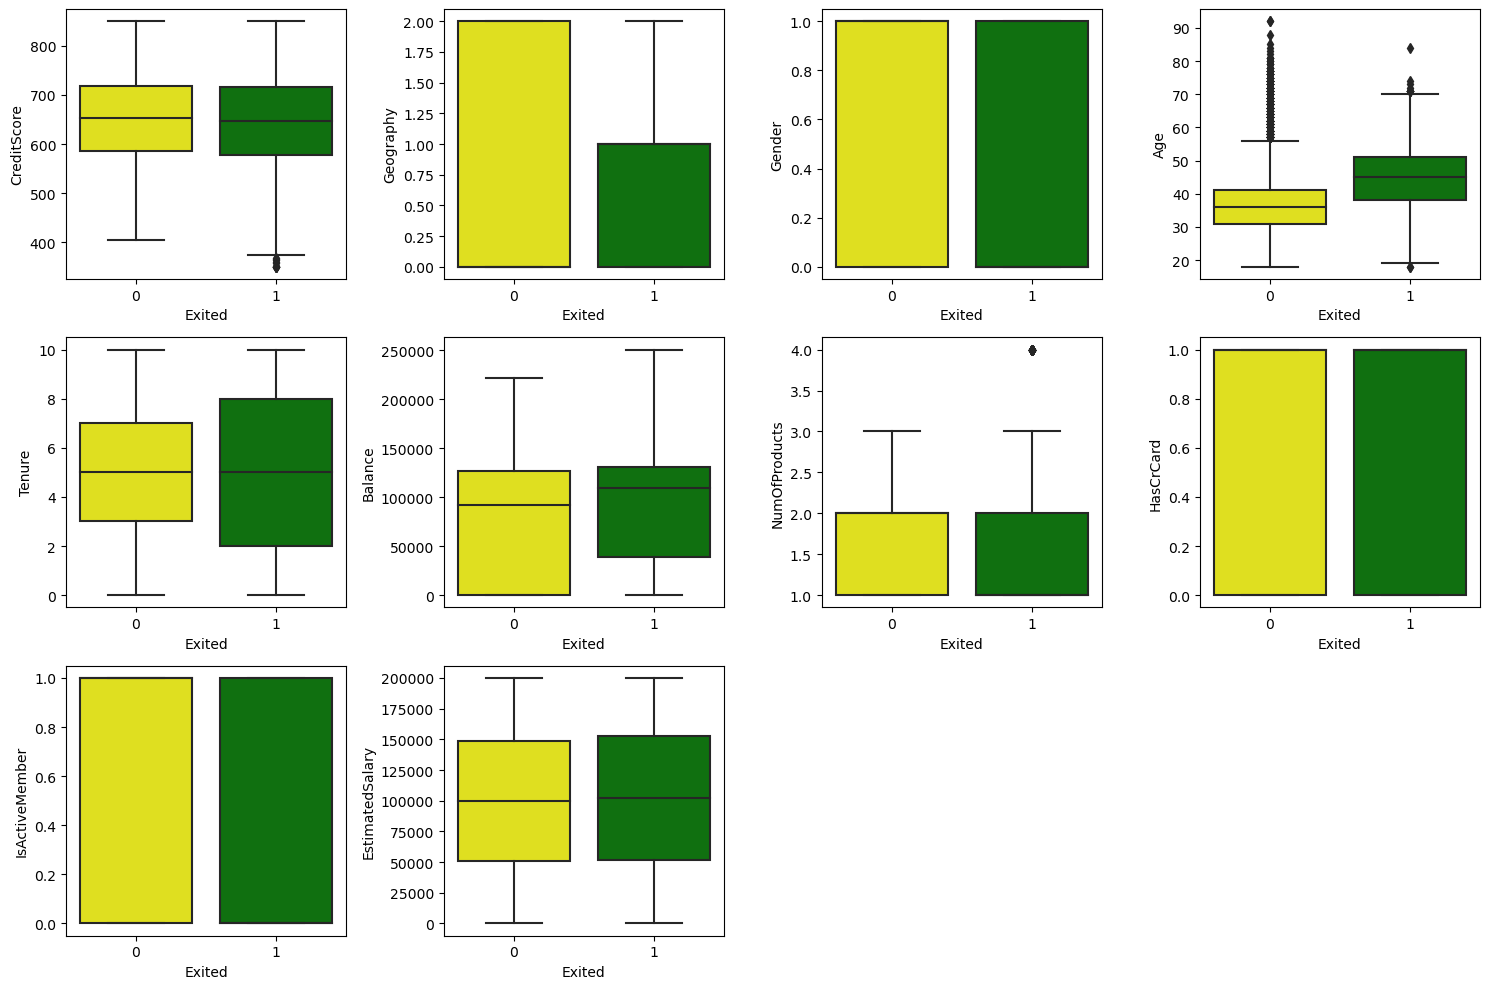

In [190]:
plt.figure(figsize=(15, 10))

num_cols = len(dataset.columns[:-1])
num_rows = (num_cols + 3) // 4  # Calculate number of rows dynamically

for i, column in enumerate(dataset.columns[:-1]):
    plt.subplot(num_rows, min(4, num_cols), i+1)  # Adjusting the number of columns per row
    sn.boxplot(x=dataset["Exited"], y=dataset[column], palette=("yellow", "green"))
    plt.tight_layout()

plt.show()

Pokusano izbacivanje outlier-a, algoritam je izbacio sve recorde vezane za korisnike koji su napustili banku. Analizu nastavljamo bez izbacivanja outlier-a

In [191]:
dataset_discretized = dataset.copy()

In [193]:
def discretize_salary(salary):
    if salary <= 0:
        return 0
    elif salary < 100000:
        return 1
    elif salary < 200000:
        return 2
    else:
        return 3

In [194]:
def discretize_balance(balance_cat):
    if balance_cat == 0:
        return 0
    else:
        return 1

In [195]:
def discretize_age(age):
    if age < 30:
        return 0
    elif age < 40:
        return 1
    elif age < 60:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

In [196]:
def discretize_credit_score(credit):
    if credit < 500:
        return 0
    elif credit < 700:
        return 1
    else:
        return 2

In [197]:
def discretize_tenure(tenure):
    if tenure <= 2:
        return 0
    elif tenure <= 8:
        return 1
    else:
        return 2

In [198]:
dataset_discretized['EstimatedSalary'] = dataset_discretized['EstimatedSalary'].apply(discretize_salary)
dataset_discretized['Balance'] = dataset_discretized['Balance'].apply(lambda x: discretize_balance(x))
dataset_discretized['Age'] = dataset_discretized['Age'].apply(discretize_age)
dataset_discretized['CreditScore'] = dataset_discretized['CreditScore'].apply(discretize_credit_score)
dataset_discretized['Tenure'] = dataset_discretized['Tenure'].apply(discretize_tenure)

dataset_discretized

CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0                1          0       0    2       0        0              1   
1                1          2       0    2       0        1              1   
2                1          0       0    2       1        1              3   
3                1          0       0    1       0        0              2   
5                1          2       1    2       1        1              2   
...            ...        ...     ...  ...     ...      ...            ...   
9997             2          0       0    1       1        0              1   
9998             2          1       1    2       1        1              2   
9999             2          1       1    2       1        1              2   
10000            2          0       0    0       1        1              1   
10001            2          0       0    0       1        1              1   

       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0            1.0             1.0                2       1  
1            0.0             1.0                2       0  
2            1.0             0.0                2       1  
3            0.0             0.0                1       0  
5            1.0             0.0                2       1  
...          ...             ...              ...     ...  
9997         0.0             1.0                1       1  
9998         1.0             0.0                1       1  
9999         1.0             0.0                1       1  
10000        1.0             0.0                1       0  
10001        1.0             0.0                1       0  

[9998 rows x 11 columns]

Dalju analizu radicemo sa 3 dataseta:
* originalnim datasetom
* datasetom koji je skaliran StandardScalerom
* datasetom nad kojim je primenjena svojevrsna diskretizacija 

# Odredjivanje broja klastera

In [199]:

#linked = linkage(dataset, 'ward')

#dendrogram(linked, orientation='top', show_leaf_counts=False)
#plt.show()

Analizom dendrograma uocavamo 4 klastera

Elbow metodom takodje zakljucujemo da je najoptimalniji broj klastera 4

Text(0.5, 1.0, 'Elbow method')

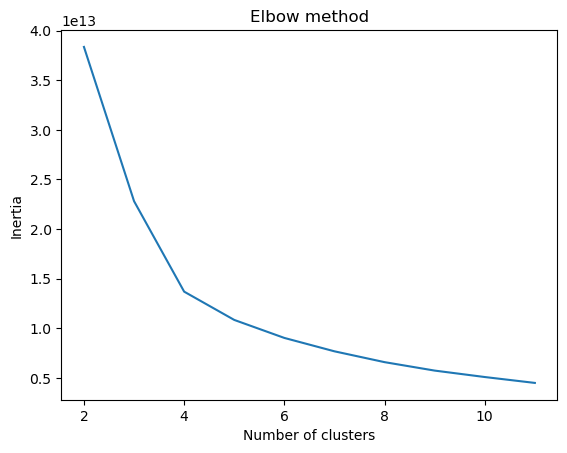

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

scores = [KMeans(n_clusters=i+2).fit(dataset).inertia_ 
          for i in range(10)]
sns.lineplot(x=np.arange(2, 12), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Elbow method")

Kako silhouette score treba biti sto veci, zakljucujemo da se najbolja vrednost dobija za 4 klastera

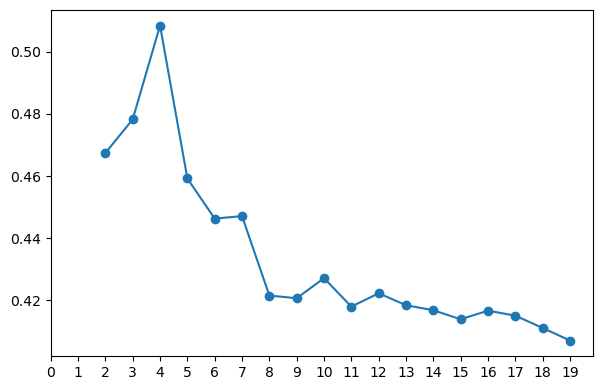

In [201]:
from sklearn.metrics import silhouette_score

N=20
sil=[]

for i in range(2,N):    
  clusterer = KMeans(n_clusters=i).fit(dataset)
  cluster_labels = clusterer.labels_
  silhouette_avg = silhouette_score(dataset, cluster_labels)
  sil.append(silhouette_avg)

ax = plt.figure(figsize=(7,4.5)).gca()
ax.plot(range(2,N),sil, "-o")
ax.set_xticks(range(0,N,1))
plt.show()

Zakljucak: dalju analizu radimo za 4 klastera

# K-MEANS

In [202]:
def calculate_clustering_metrics(title, labels, dataset = dataset):
    print(title)

    print("Silhouette score: ", silhouette_score(dataset, labels))
    print("Davies-Bouldin: ", davies_bouldin_score(dataset, labels))

In [203]:
def define_pca(dataset): 

    pca = PCA(n_components=3)
    dataset_pca = pca.fit_transform(dataset)
    dataset['PCA1'] = dataset_pca[:, 0]
    dataset['PCA2'] = dataset_pca[:, 1]
    dataset['PCA3'] = dataset_pca[:, 2] 
    return dataset

In [204]:
def visualize_clusters_3d(dataset, title, labels_column_name): 
    fig_3d = px.scatter_3d(dataset, 
                    x='PCA1', 
                    y='PCA2', 
                    z='PCA3', 
                    color=labels_column_name,
                    width=600, 
                    height=600,
                    title=title)
    fig_3d.show()

In [205]:
def perform_and_visualize_kmeans(dataset) :
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
    dataset['cluster'] = kmeans.fit_predict(dataset)

    visualize_clusters_3d(dataset, 'KMeans clustering', 'cluster')
    calculate_clustering_metrics("KMeans clustering", dataset['cluster'], dataset)

    return dataset

In [206]:
dataset_for_kmeans_original = dataset.copy()
dataset_original_kmeans_cluster = perform_and_visualize_kmeans(define_pca(dataset_for_kmeans_original))

KMeans clustering
Silhouette score:  0.5083242016438406
Davies-Bouldin:  0.6422352007703602


In [220]:
dataset_scaled_for_kmeans = dataset_scaled.copy()
dataset_scaled_kmeans_clusters = perform_and_visualize_kmeans(define_pca(dataset_scaled_for_kmeans))

KMeans clustering
Silhouette score:  0.1842036913623779
Davies-Bouldin:  1.7503903447674514


# Agglomerative clustering

In [210]:
def perform_and_visualize_agglomerative(dataset):
    agglomerative = AgglomerativeClustering(n_clusters=4)
    dataset['cluster_agglomerative'] = agglomerative.fit_predict(dataset)

    visualize_clusters_3d(dataset, 'Agglomerative clustering', 'cluster_agglomerative')
    calculate_clustering_metrics("Agglomerative clustering", dataset['cluster_agglomerative'], dataset)

    return dataset


In [211]:
dataset_for_agglomerative_original = dataset.copy()
dataset_agglomerative_clusters = perform_and_visualize_agglomerative(define_pca(dataset_for_agglomerative_original))

Agglomerative clustering
Silhouette score:  0.49618332455500236
Davies-Bouldin:  0.6495967024605427


In [212]:
dataset_for_agglomerative_scaled = dataset_scaled.copy()
dataset_scaled_agglomerative_clusters = perform_and_visualize_agglomerative(define_pca(dataset_for_agglomerative_scaled))

Agglomerative clustering
Silhouette score:  0.19180318459239443
Davies-Bouldin:  1.7318152809723637


# GMM

In [238]:
def perform_and_visualize_gmm(dataset) :

    gmm_model = GaussianMixture(n_components=4, random_state=7)
    dataset['gmm'] = gmm_model.fit_predict(dataset)
    
    visualize_clusters_3d(dataset, 'GMM clustering', 'gmm')
    calculate_clustering_metrics("GMM clustering", dataset['gmm'], dataset)

    return dataset

In [237]:
dataset_for_gmm_original = dataset.copy()
dataset_orginal_gmm_clusters = perform_and_visualize_gmm(define_pca(dataset_for_gmm_original))

GMM clustering
Silhouette score:  0.4777711611743753
Davies-Bouldin:  0.6549052256973105


In [221]:
dataset_for_gmm_scaled = dataset_scaled.copy()
dataset_scaled_gmm_clusters = perform_and_visualize_gmm(define_pca(dataset_for_gmm_scaled))

GMM clustering
Silhouette score:  0.16046237503045865
Davies-Bouldin:  1.9124227382083792


# DBSCAN

In [215]:
def perform_and_visualize_dbscan(dataset, eps, min_samples) :

    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    dataset['dbscan_cluster'] = dbscan_model.fit_predict(dataset)
    
    visualize_clusters_3d(dataset, 'DBSCAN clustering', 'dbscan_cluster')
    calculate_clustering_metrics("DBSCAN clustering", dataset['dbscan_cluster'], dataset)

    return dataset 

In [219]:
dataset_for_dbscan_analysis = dataset_scaled.copy()

min_samples_range = range(2, 11)
eps_range = np.linspace(0.1, 2.0, num=20)

best_score = -1
best_eps = None
best_min_samples = None

for min_samples in min_samples_range:
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(dataset_for_dbscan_analysis)
        if len(set(labels)) > 1:
            score = silhouette_score(dataset_for_dbscan_analysis, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps} Best min_samples: {best_min_samples}")

Best eps: 2.0 Best min_samples: 9


In [217]:
dataset_for_dbscan_scaled = dataset_scaled.copy()
dataset_scaled_dbscan_clusters = perform_and_visualize_dbscan(define_pca(dataset_for_dbscan_scaled), 2, 9)

DBSCAN clustering
Silhouette score:  0.1863524613996549
Davies-Bouldin:  1.5279368023128523


# Feature importance

In [293]:
def feature_importance_xgboost(dataset_for_xgboost):

    # Assuming your model is already defined and trained, and your dataset is ready
    model = XGBRegressor()
    model.fit(dataset_for_xgboost.drop(columns=['Exited']), dataset_for_xgboost['Exited'])

    # Get feature importances
    importance = model.feature_importances_

    # Get feature names from dataset columns
    feature_names = dataset_for_xgboost.drop(columns=['Exited']).columns

    # Summarize feature importance
    for i, (feature, importance_score) in enumerate(zip(feature_names, importance)):
        print('Feature: {}, Score: {:.5f}'.format(feature, importance_score))

    # Plot feature importance
    plt.figure(figsize=(6, 6))
    plt.bar(feature_names, importance)
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()

    # Filter the dataset columns based on feature importance score
    important_features = [feature for feature, score in zip(feature_names, importance) if score > 0.1]

    print("Important Features:", important_features)

    return important_features

Feature: CreditScore, Score: 0.02790
Feature: Geography, Score: 0.06600
Feature: Gender, Score: 0.04354
Feature: Age, Score: 0.13668
Feature: Tenure, Score: 0.03389
Feature: Balance, Score: 0.05547
Feature: NumOfProducts, Score: 0.26156
Feature: HasCrCard, Score: 0.03402
Feature: IsActiveMember, Score: 0.30276
Feature: EstimatedSalary, Score: 0.03817


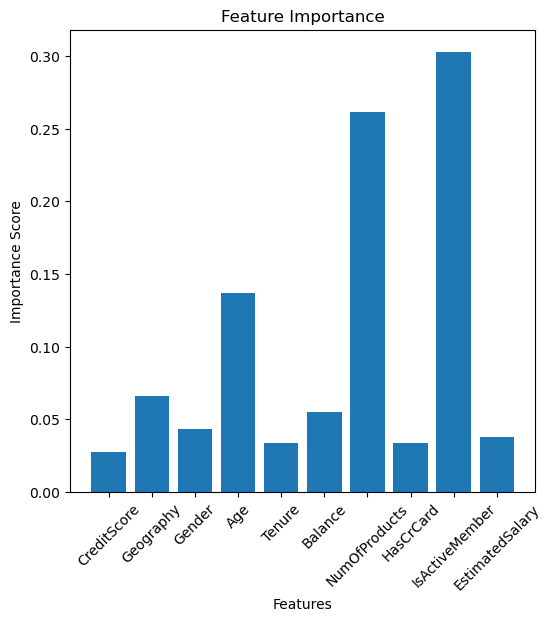

Important Features: ['Age', 'NumOfProducts', 'IsActiveMember']


['Age', 'NumOfProducts', 'IsActiveMember']

In [294]:
dataset_feature_improtance = dataset_scaled.copy()
feature_importance_xgboost(dataset_feature_improtance)

In [295]:
dataset_feature_improtance.drop(columns=["CreditScore", "Geography", "Gender", "Tenure", "Balance", "HasCrCard", "EstimatedSalary"], inplace=True)

In [296]:
dataset_feature_improtance

Age  NumOfProducts  IsActiveMember    Exited
0     0.293657      -0.911570        0.970820  1.976307
1     0.198305      -0.911570        0.970820 -0.505994
2     0.293657       2.526981       -1.030057  1.976307
3     0.007601       0.807705       -1.030057 -0.505994
4     0.484361       0.807705       -1.030057  1.976307
...        ...            ...             ...       ...
9993 -0.278455      -0.911570        0.970820  1.976307
9994  0.293657       0.807705       -1.030057  1.976307
9995  0.293657       0.807705       -1.030057  1.976307
9996 -1.041271      -0.911570       -1.030057 -0.505994
9997 -1.041271      -0.911570       -1.030057 -0.505994

[9998 rows x 4 columns]

In [298]:
dataset_for_kmeans_f_i = dataset_feature_improtance.copy()
perform_and_visualize_kmeans(define_pca(dataset_for_kmeans_f_i))

KMeans clustering
Silhouette score:  0.5015741276396428
Davies-Bouldin:  0.8611111144531204


Age  NumOfProducts  IsActiveMember    Exited      PCA1      PCA2  \
0     0.293657      -0.911570        0.970820  1.976307  1.591137  0.666182   
1     0.198305      -0.911570        0.970820 -0.505994 -0.263221  0.996061   
2     0.293657       2.526981       -1.030057  1.976307  1.355754 -1.006076   
3     0.007601       0.807705       -1.030057 -0.505994 -0.306194 -0.806602   
4     0.484361       0.807705       -1.030057  1.976307  1.791219 -0.965323   
...        ...            ...             ...       ...       ...       ...   
9993 -0.278455      -0.911570        0.970820  1.976307  1.226556  0.409445   
9994  0.293657       0.807705       -1.030057  1.976307  1.669692 -1.050902   
9995  0.293657       0.807705       -1.030057  1.976307  1.669692 -1.050902   
9996 -1.041271      -0.911570       -1.030057 -0.505994 -0.660656 -1.322112   
9997 -1.041271      -0.911570       -1.030057 -0.505994 -0.660656 -1.322112   

          PCA3  cluster  
0    -0.686075        2  
1    -1.001527        0  
2     2.832537        2  
3     0.804679        1  
4     1.166353        2  
...        ...      ...  
9993 -0.755409        2  
9994  1.143242        2  
9995  1.143242        2  
9996 -1.011728        1  
9997 -1.011728        1  

[9998 rows x 8 columns]

# Analiza dobijenih klastera

KMeans on scaled dataset

In [274]:
def visualize_all_atributes(dataset, column_name) : 
    for attribute in dataset.columns:
        g = sns.FacetGrid(dataset, col=column_name, col_wrap=5)
        g.map(sns.histplot, attribute, kde=False)
        g.set_titles("Cluster {col_name}")
        plt.tight_layout()
        plt.show()

In [306]:
dataset_scaled_kmeans_clusters.drop(columns=['PCA1', 'PCA2', 'PCA3'], inplace=True)

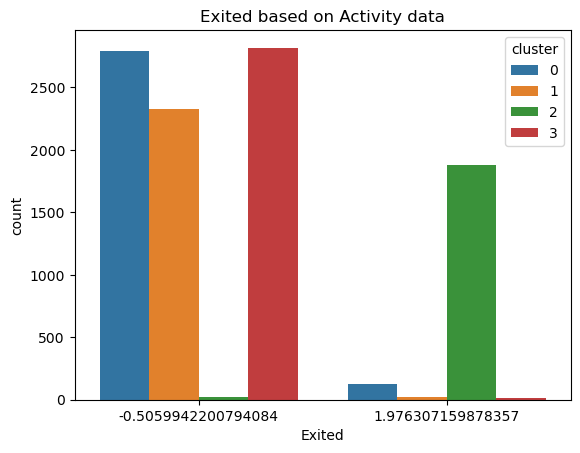

In [307]:
sn.countplot(
    x="Exited", hue="cluster", data=dataset_scaled_kmeans_clusters
)
plt.title("Exited based on Activity data")
plt.show()

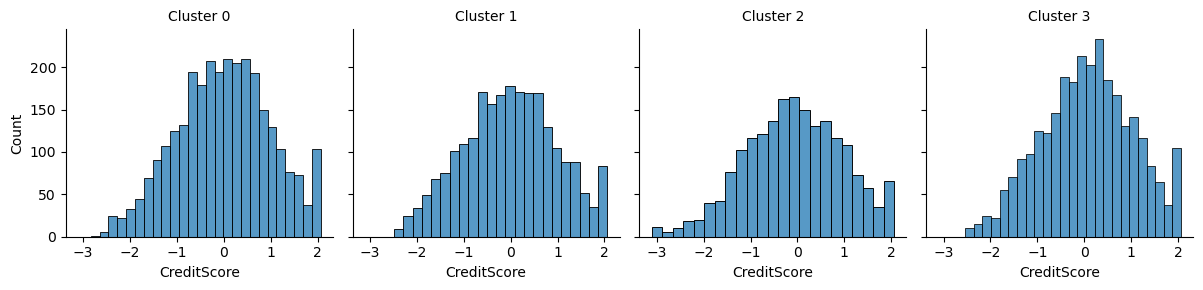

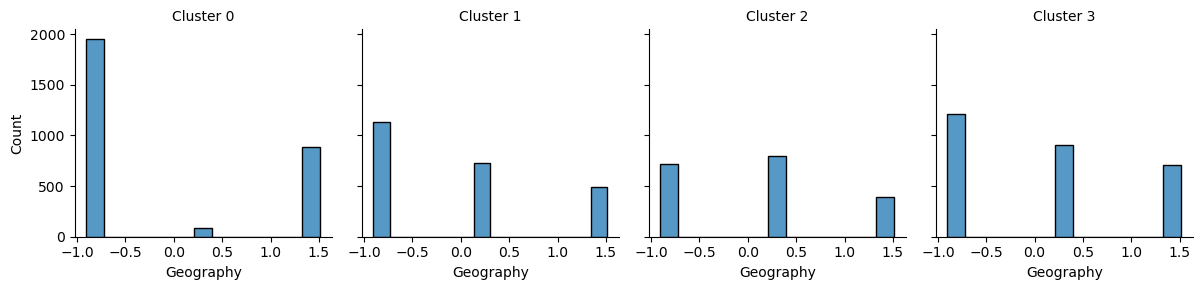

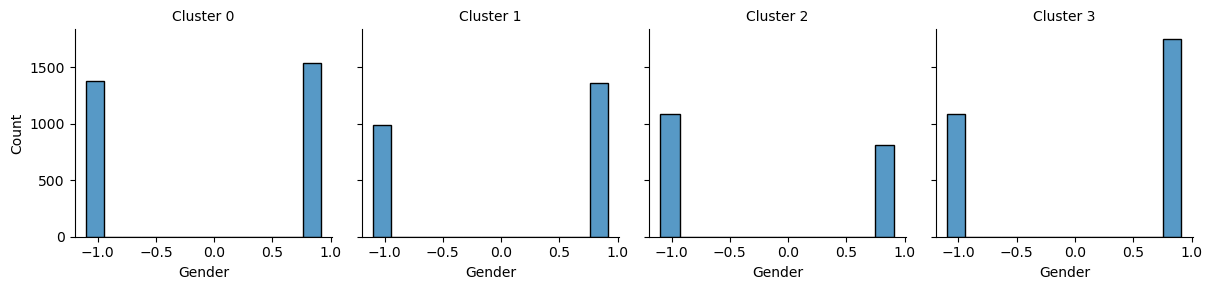

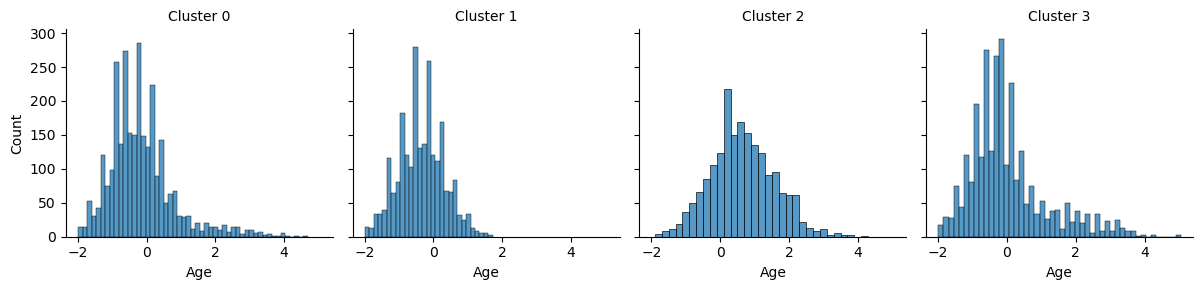

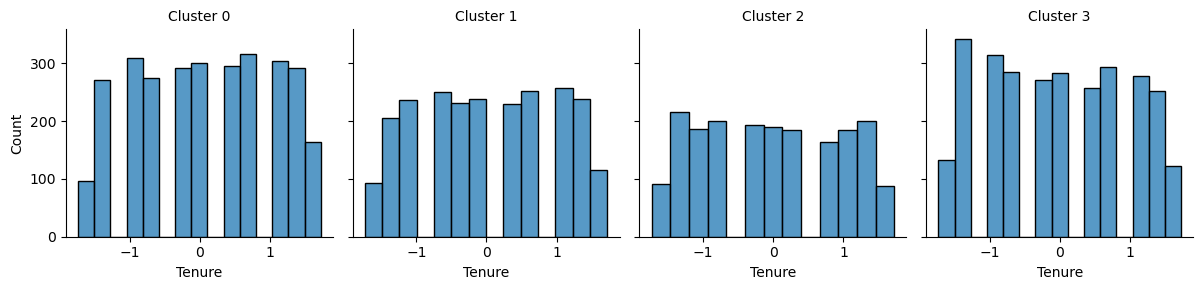

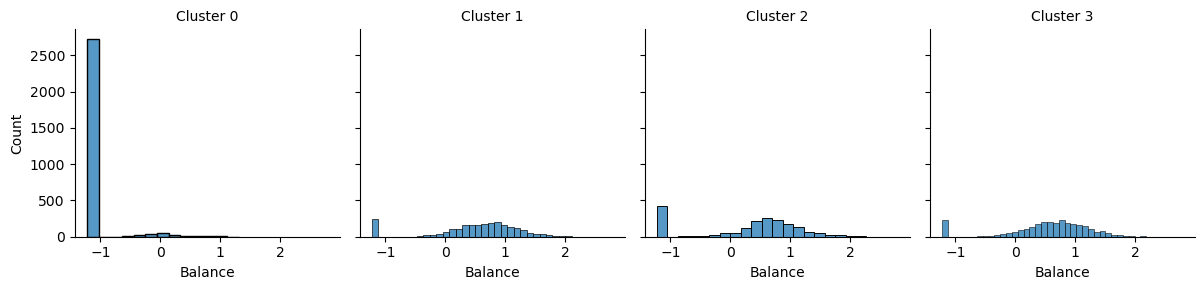

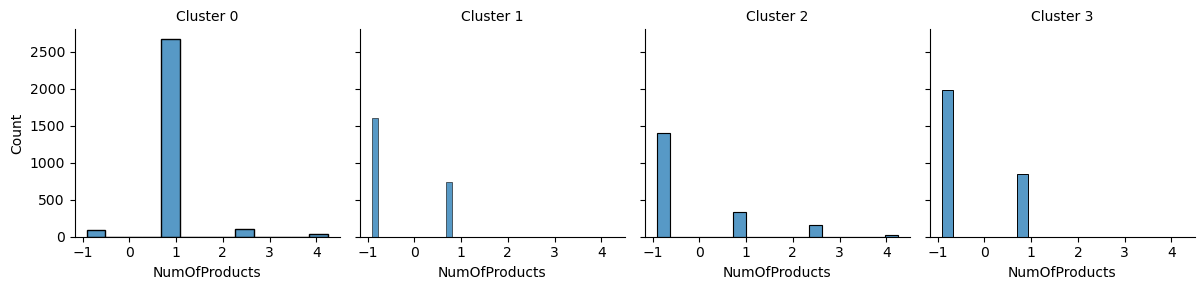

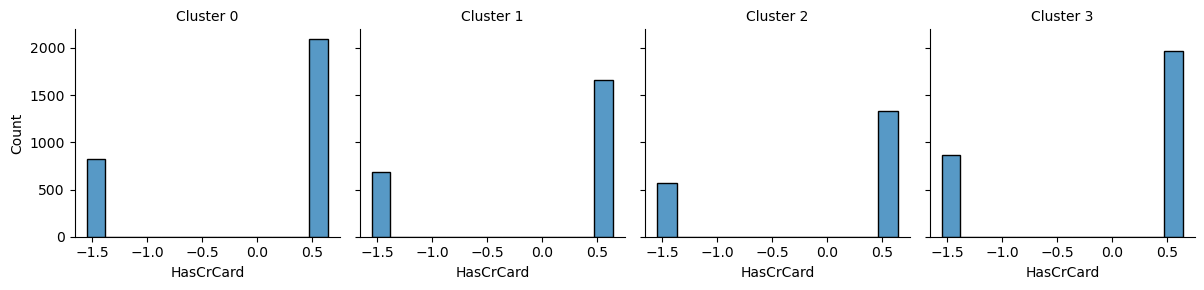

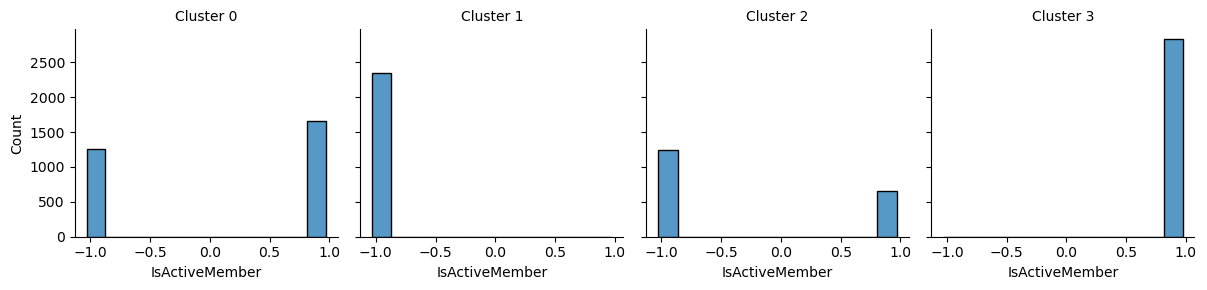

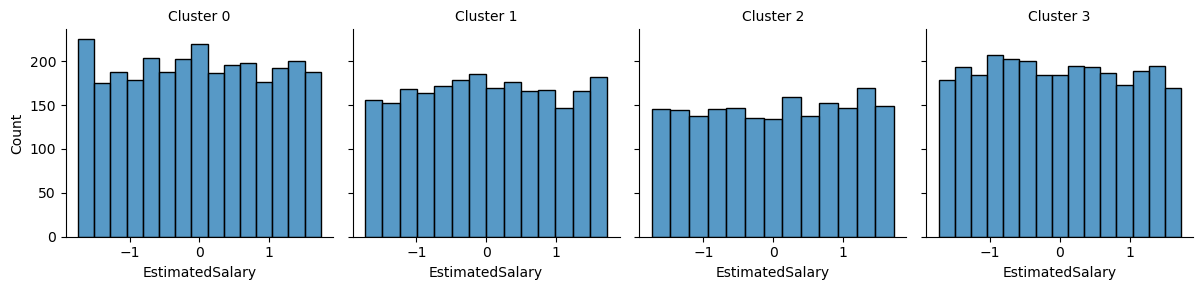

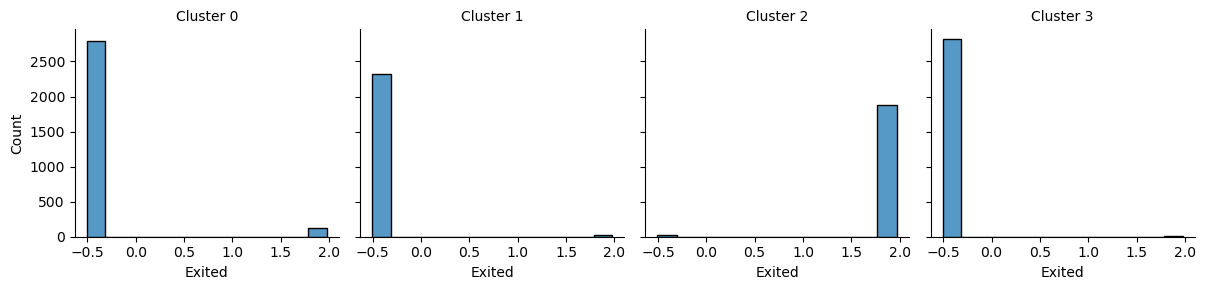

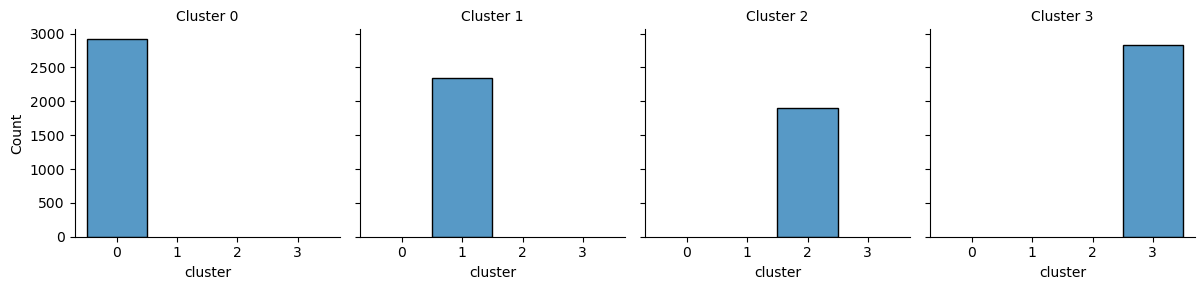

In [308]:
visualize_all_atributes(dataset_scaled_kmeans_clusters, 'cluster')

Analiza: Cluster 0

Radi se o klasteru korisnika u kojoj su podjednako zastupljeni i muskarci i zene, a u kojoj je, iako mala, ipak uocena tendencija ka napustanju banke. 
Podjednako su zastupljeni i aktivni i neaktivni korisnici, sa blagom prednoscu u korist aktivnih korisnika. 
Procenjena plata takodje varira unutar celog opsega vrednosti ravnomerno, ali u ovom klasteru imamo najvecu zastupljenost korisnika sa platom 0.
Najvecim delom radi se o korisnicima koji koriste samo 1 bankovni proizvod, ali ima i onih sa 2, 3 ili cak 4 proizvoda.
Vecim delom koriste kreditnu karticu.
U ovom klasteru ima korisnika svih starosnih dobi, ali je veca zastupljenost mladjih korisnika. 
Podjednako zastupljeni korisnici iz Francuske i Spanije.
Najizrazeniji atribut u ovom klasteru jeste stanje na racunu - koje je za najveci deo korisnika 0.



Zakljucak: Cluster 0 - Potencijalno rizicna grupa

Nezavnisno od pola, posebnu paznju obratiti na francuske i spanske korisnike cije je stanje na racunu 0 i procenjenom platom 0. Potencijalna klasifikacija: studenti. Buduci da se na ove faktore ne moze uticati, pokusati smanjenje troskova odrzavanja racuna, kao i posebne pogodnosti za dobijanje novog proizvoda banke, kako bi se osiguralo ostajanje klijenata u istoj.

Analiza: Cluster 1

Sve 3 nacionalnosti podjednako zastupljene, najveci broj francuskih korisnika muskog pola.
Radi se o korisnicima mladje zivotne dobi, podjednako zastupljeni i korisnici sa primanjima, ali i sa platom 0. Radi se o korisnicima koji nemaju nijedan ili koriste samo 1 proizvod banke. Najvecim delom poseduju kreditnu karticu, ali nisu aktivni korisnici.

Zakljucak: Cluster 1 - Grupa niskog rizika

Muskarci mlade zivotne dobi iz Francuske, nezavisno od primanja i aktivnosti ne predstavljaju rizicnu grupu koja bi potencijalno napustila banku.

Analiza: Cluster 2

Najzastupljeniji korisnici iz Nemacke, potom iz Francuske. Najmanja zastupljenost Spanaca.
Ravnomerno zastupljeni i muskarci i zene, blago veci broj zena u klasteru.
Radi se o korisnicima svih starosnih dobi, ali pretezno i najvecim delom srednje. 
Stanje na racunu takodje varira u okviru definisanog opsega vrednosti, uz izdvajanje korisnika sa stanjem 0.
Najveci broj korisnika nema proizvode banke, ali imamo pojave korisnika sa 2, 3 pa cak i 4 proizvoda.
Vise od polovine korisnika ima kreditnu karticu, ali se radi o neaktivnim korisnicima.
Svi korisnici iz ovog klastera su napustili banku.

Zakljucak: Cluster 2 - Visoko rizicna grupa

Korisnici srednje zivotne dobi, najvecim delom sa teritorije Nemacke. Pol ne igra bitnu ulogu, ali veci procenat zena. Buduci da su ovde zastupljeni i korisnici sa 2, 3 i 4 proizvoda, potencijalno razmotriti ideju smanjenja troskova odrzavanja bankovnih proizvoda ili kreiranja posebne promocije za Nemacko trziste. 

Analiza: Cluster 3

Ravnomerna zastupljenost svih nacionalnosti, najvise Francuza i Nemaca. Najvise muskaraca u odnosu na sve klastere. Radi se pretezno o korisnicima mladje zivotne dobi, ali je i zastupljenost svih ostalih starosnih grupa najveca u odnosu na sve klastere. Podjednako zastupljeni korisnici koji su klijenti banke od 2-10 godina, uz posebno isticanje klijenata koji su tek dosli u banku, odnosno cije su godine saradnje sa bankom od 0-2. Ravnomerna zastupljenost svih plata iz definisanog opsega vrednosti. Radi se o aktivnim korisnicima, koji uglavnom nemaju nijedan proizvod ili imaju najvise jedan. Najvecim delom korisnici imaju kreditnu karticu, ali ima i pojava koje je nemaju.

Zakljucak: Cluster 3 - Grupa izuzetno niskog rizika

Radi se o korisnicima svih zivotnih dobi, ali najveci broj mladjih korisnika. Ovo su novi korisnici, koji su tek dosli u banku. Iako stabilna grupa, kroz raniju analizu uoceno da korisnici postaju rizicna grupa za napustanje banke nakon 2-4 godine saradnje

KMeans with intact data

In [310]:
dataset_original_kmeans_cluster.drop(columns=['PCA1', 'PCA2', 'PCA3'], inplace=True)

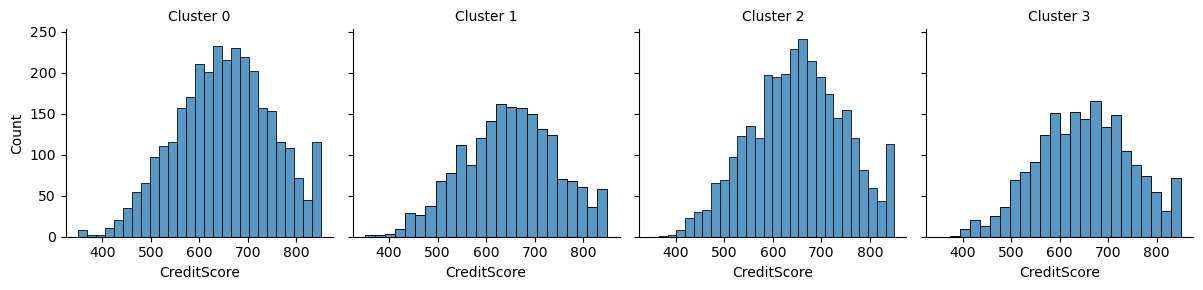

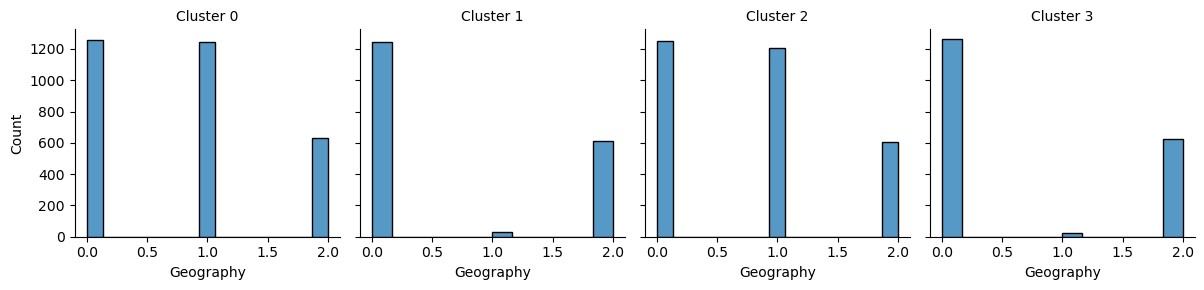

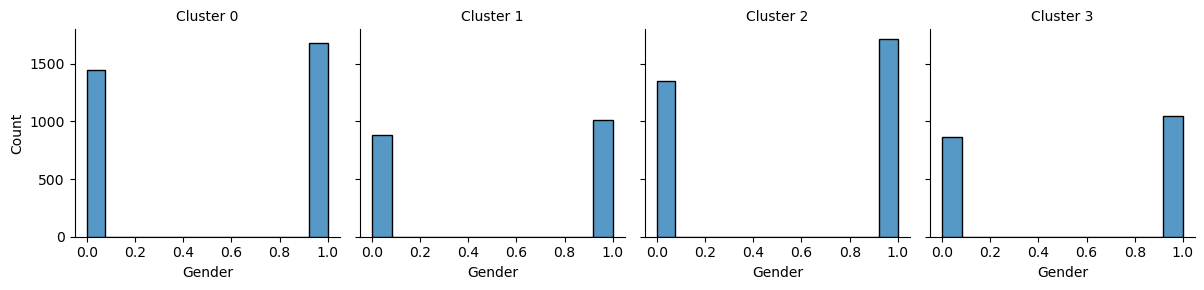

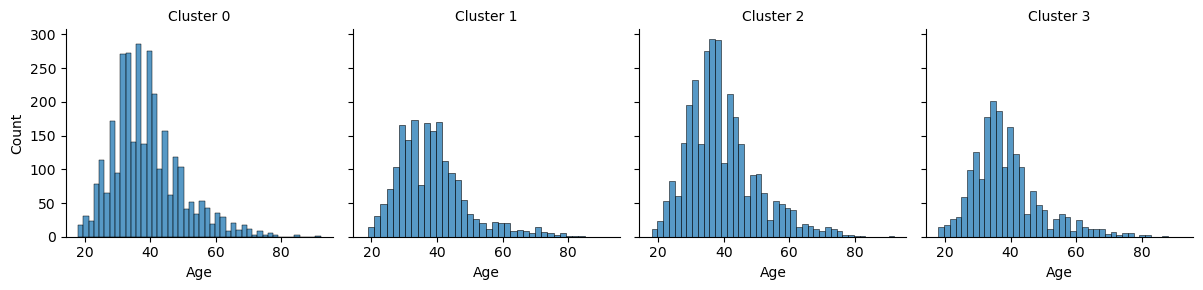

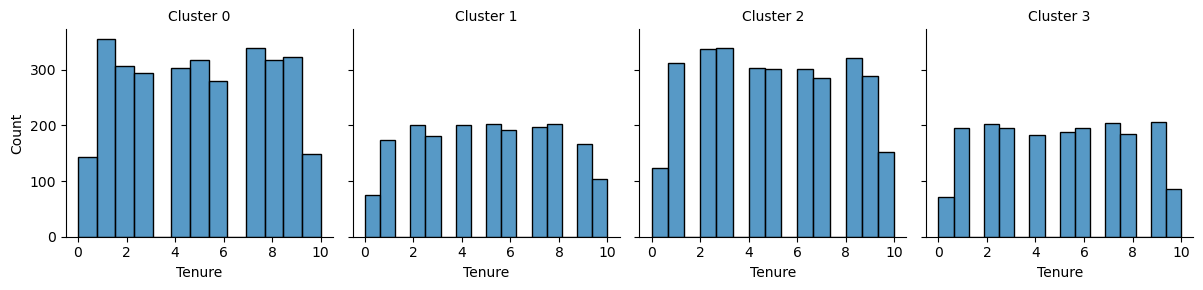

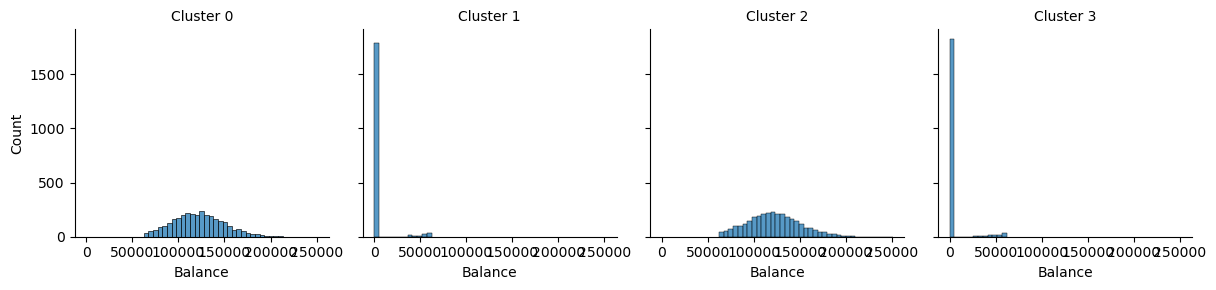

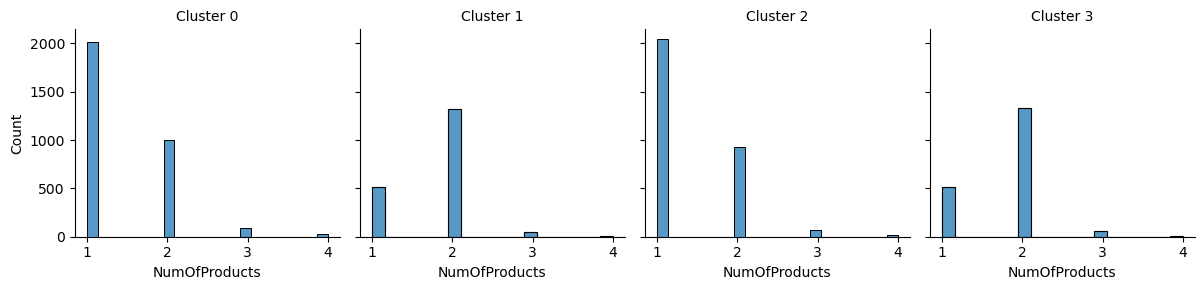

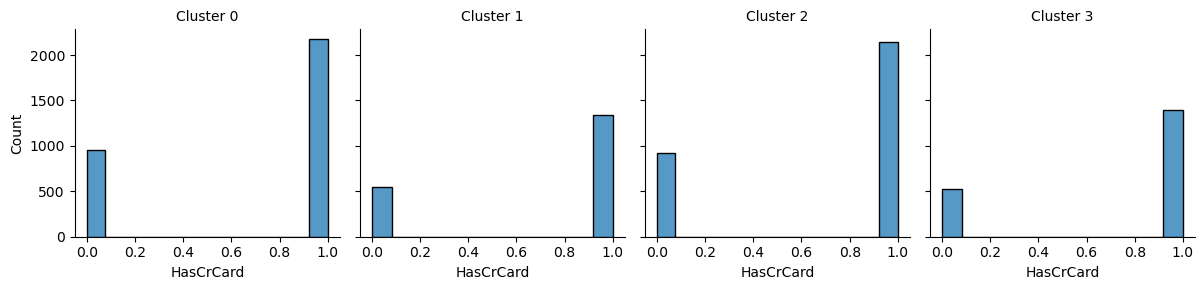

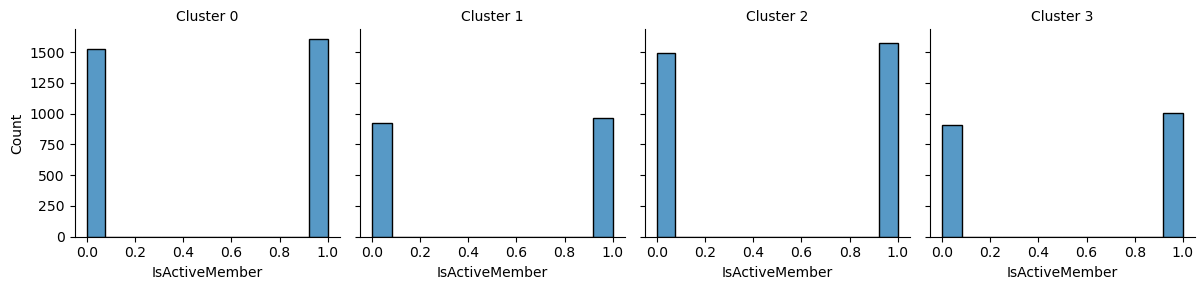

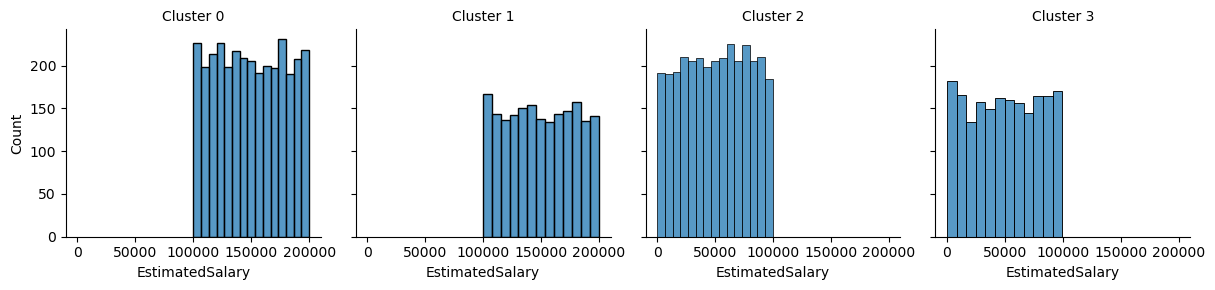

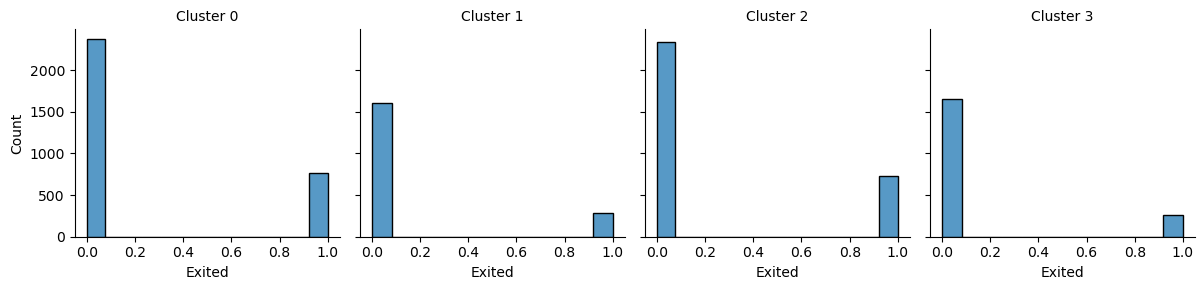

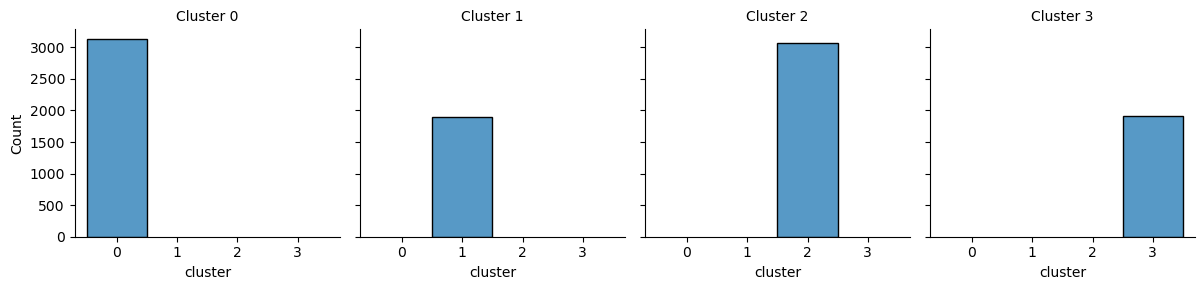

In [311]:
visualize_all_atributes(dataset_original_kmeans_cluster, 'cluster')